# Example $r^i=M^i{}_jM^j{}_ku^k$

$r^i = M^i{}_jM^j{}_ku^k$, if ADM_ConstringNorm=Msqr

$r^i = M^i{}_ju^j$, otherwise

## Load xAct\`xTras\`, and set some global variables

In [1]:
<< ../xActToC.wl

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
Package xAct`xPert`  version 1.0.6, {2018, 2, 28}
CopyRight (C) 2005-2020, David Brizuela, Jose M. Martin-Garcia and Guillermo\
 
>   A. Mena Marugan, under the General Public License.
** Variable $PrePrint assigned value ScreenDollarIndices
** Variable Prefix changed from Prefix to Postfix
** Option AllowUpperDerivatives of ContractMetric changed from False to True
** Option MetricOn of MakeRule changed from None to All
** Option ContractMetrics of MakeRule changed 

## Set Manifold and Chart

### Dimension=3

In [2]:
SetManifoldAndChart[3, cartesian, "[[ijk]]"];
(* SetManifoldAndChart[3, cartesian, "[[ijk]]", tensorIndexRange -> Union[Complement[IndexRange[a,z],{g}], Table[ToExpression["h"<>ToString[i]],{i,1,9}],
                                                                                                        Table[ToExpression["z"<>ToString[i]],{i,1,9}]]]
*)

### More setup (not needed in most common cases)

In [4]:
DefMetric[1, euclid[-i,-j], CD, PrintAs->"\[Delta]"];
MetricInBasis[euclid, -cartesian, DiagonalMatrix[{1,1,1}]];
MetricInBasis[euclid, cartesian, DiagonalMatrix[{1,1,1}]];

FoldedRule[{euclid[{2, cartesian}, {1, cartesian}] -> 
 
>     euclid[{1, cartesian}, {2, cartesian}], 
 
>    euclid[{3, cartesian}, {1, cartesian}] -> euclid[{1, cartesian}, {3, cartesian}], 
 
>    euclid[{3, cartesian}, {2, cartesian}] -> euclid[{2, cartesian}, {3, cartesian}]}, 
 
>   {euclid[{1, cartesian}, {1, cartesian}] -> 1, 
 
>    euclid[{1, cartesian}, {2, cartesian}] -> 0, 
 
>    euclid[{1, cartesian}, {3, cartesian}] -> 0, 
 
>    euclid[{2, cartesian}, {2, cartesian}] -> 1, 
 
>    euclid[{2, cartesian}, {3, cartesian}] -> 0, 
 
>    euclid[{3, cartesian}, {3, cartesian}] -> 1}, 
 
>   {euclid[{2, -cartesian}, {1, -cartesian}] -> 
 
>     euclid[{1, -cartesian}, {2, -cartesian}], 
 
>    euclid[{3, -cartesian}, {1, -cartesian}] -> 
 
>     euclid[{1, -cartesian}, {3, -cartesian}], 
 
>    euclid[{3, -cartesian}, {2, -cartesian}] -> 
 
>     euclid[{2, -cartesian}, {3, -cartesian}]}, 
 
>   {euclid[{1, -cartesian}, {1, -cartesian}] -> 1, 
 
>    euclid[{1, -cartesian}, {2, -cartesian}] -> 0, 
 
>    euclid[{1, -cartesian}, {3, -cartesian}] -> 0, 
 
>    euclid[{2, -cartesian}, {2, -cartesian}] -> 1, 
 
>    euclid[{2, -cartesian}, {3, -cartesian}] -> 0, 
 
>    euclid[{3, -cartesian}, {3, -cartesian}] -> 1}]
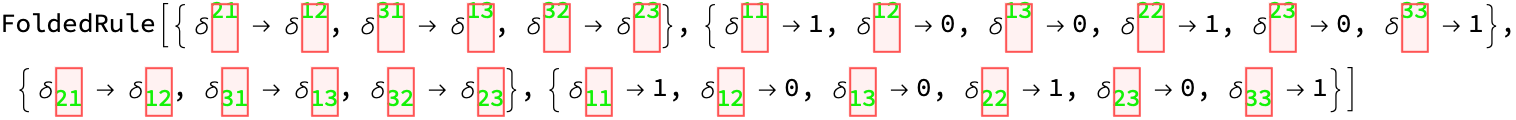

In [7]:
TensorValues[euclid]

euclid[-k, -l]
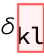

In [8]:
euclid[-k,-l]

## Define Variable List and Equations

### Variable List

In [7]:
dtEvolVarlist = {
   {rU[i], PrintAs->"r"}
};
EvolVarlist = {
   {uU[i], PrintAs->"u"}
};
MoreInputVarlist = {
   {MDD[-i,-j], Symmetric[{-i,-j}], PrintAs->"M"}
};
TempVarlist = {
   {vU[i], PrintAs->"v"}
};

### Set up components

In [11]:
ManipulateVarlist["set components: independent varlist index", dtEvolVarlist];
ManipulateVarlist["set components: independent varlist index", EvolVarlist];
ManipulateVarlist["set components: independent varlist index", MoreInputVarlist];
ManipulateVarlist["set components: for temporary varlist", TempVarlist];

FoldedRule[{}, {rU[{1, cartesian}] -> rU1[[ijk]], rU[{2, cartesian}] -> rU2[[ijk]], 
 
>    rU[{3, cartesian}] -> rU3[[ijk]]}]
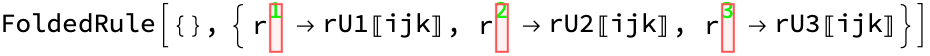

In [18]:
TensorValues[rU]

### Equations

In [15]:
IndexSet[RHSOf[vU][i_], euclid[i, k] MDD[-k, -j] uU[j]];

euclid[i, b] MDD[-b, -a] uU[a]
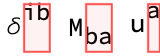

In [16]:
RHSOf[vU][i]

In [17]:
IndexSet[RHSOf[rU, "Msqr"][i_], euclid[i, k] MDD[-k, -j] vU[j]];

euclid[i, b] MDD[-b, -a] vU[a]
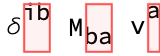

In [18]:
RHSOf[rU, "Msqr"][i]

In [19]:
IndexSet[RHSOf[rU, "otherwise"][i_], vU[i]];

In [20]:
RHSOf[rU, "otherwise"][i]

vU[i]

## Write to C-File

### Set more global variables

In [21]:
$outputFile = "test.c";
$projectName = "C3GH";

### Head Part

In [23]:
$headPart[] := Module[{},
   pr["#include \"nmesh.h\""];
   pr["#include \"" <> $projectName <> ".h\""];
   pr[];
   pr["#define Power(x,y) (pow((double) (x),(double) (y)))"];
   pr["#define Log(x) log((double) (x))"];
   pr["#define pow2(x) ((x)*(x))"];
   pr["#define pow2inv(x) (1.0/((x)*(x)))"];
   pr["#define Cal(x,y,z) ((x)?(y):(z))"];
   pr["#define Sqrt(x) sqrt(x)"];
   pr["#define Abs(x) fabs(x)"];
   pr[];
   pr[];
   pr["/* use globals from " <> $projectName <> " */"];
   pr["extern t" <> $projectName <> " " <> $projectName <> "[1];"];
   pr[];
   pr[];
   pr["void test(tVarList *vlu, tVarList *vlr)"];
   pr["{"];
   pr["tMesh *mesh = u->mesh;"];
   pr[];
   pr["int Msqr = GetvLax(Par(\"ADM_ConstraintNorm\"), \"Msqr \");"];
   pr[];
   pr["formylnodes(mesh)"];
   pr["{"];
   pr["tNode *node = MyLnode;"];
   pr["int ijk;"];
   pr[];
   pr["forpoints(node, ijk)"];
   pr["{"];
   pr["int iMDD = Ind(\"ADM_gxx\");"];
   pr[];
];

### Body part

In [24]:
$bodyPart[] := Module[{},
  (* print initializations *)
  Print["Printing components ..."];
  ManipulateVarlist["print components initialization: vlr", dtEvolVarlist];
  ManipulateVarlist["print components initialization: vlu", EvolVarlist];
  ManipulateVarlist["print components initialization: more input/output", MoreInputVarlist];
  ManipulateVarlist["print components equation: temporary", TempVarlist];
  pr[];
  (* print equations *)
  Print["Printing components ..."];
  pr["if(Msqr)"];
  pr["{"];
  (*ManipulateVarlist[
  "print components equation: primary with suffix",dtEvolVarlist, suffixName->"Msqr"];*)
  ManipulateVarlist["print components equation: primary with suffix", dtEvolVarlist, {coordinate -> cartesian, gridPointIndex -> "[[ijk]]", suffixName -> "Msqr"}];
  pr["}"];
  pr["else"];
  pr["{"];
  ManipulateVarlist["print components equation: primary with suffix", dtEvolVarlist, suffixName -> "otherwise"];
  pr["}"];
  pr[];
];

### End part

In [25]:
$endPart[] := Module[{},
      pr["} /* end of points */"];
      pr["} /* end of nodes */"];
      pr["}"];
];

In [26]:
<< ../Codes/Nmesh.wl

 Writing to test.c
test.c already exist, replacing it ...

Printing components ...
Printing components ...
Done generating test.c

